In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns

In [2]:
!pip install tensorflow

In [3]:
df = pd.read_csv(r"C:\Users\Sparsh Mahajan\Downloads\archive (22)\Microsoft_Stock.csv")

In [4]:
df

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


In [5]:
df.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


In [6]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [7]:
df['Date'].dtype

dtype('O')

In [8]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.graph_objs import Line

fig = make_subplots(rows=5, cols=1,subplot_titles=('Open','High','Low','Close' , 'Volume'))

fig.add_trace(
    Line(x=df.index, y=df.Open),
    row=1, col=1
)

fig.add_trace(
    Line(x=df.index, y=df.High),
    row=2, col=1
)

fig.add_trace(
    Line(x=df.index, y=df.Low),
    row=3, col=1
)

fig.add_trace(
    go.Line(x=df.index, y=df.Close),
    row=4, col=1
)
fig.add_trace(
    go.Line(x=df.index, y=df.Volume),
    row=5, col=1
)

fig.update_layout(height=1400, width=1000, title_text="OHLC Line Plots")

fig.show()

c:\Users\Sparsh Mahajan\anaconda3\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [9]:
from datetime import datetime

open_data = df['Open']
high_data = df['High']
low_data = df['Low']
close_data = df['Close']
dates = df['Date']

fig = go.Figure(data=[go.Candlestick(x=dates,
                       open=open_data, high=high_data,
                       low=low_data, close=close_data,
               increasing_line_color= 'green', decreasing_line_color= 'red')])

fig.show()

since p value is higher than 0.05 the chance of null hypothesis is low

 #### therefore data is non stationary

In [10]:
rollingseries = df['Close'].diff()
print(rollingseries)

0        NaN
1      -0.43
2       1.26
3      -0.02
4      -0.11
        ... 
1506   -3.12
1507    4.14
1508   -1.24
1509   -3.39
1510    3.92
Name: Close, Length: 1511, dtype: float64


In [11]:
logrolling = np.log(df['Close'])
logrollingseries = logrolling.diff()
print(logrollingseries)

0            NaN
1      -0.010616
2       0.030794
3      -0.000481
4      -0.002652
          ...   
1506   -0.013339
1507    0.017662
1508   -0.005257
1509   -0.014516
1510    0.016766
Name: Close, Length: 1511, dtype: float64


##### since p value is less than 0.05 null hypothesis is valid 

In [15]:
from sklearn.model_selection import TimeSeriesSplit

In [16]:
tscv = TimeSeriesSplit(n_splits = 3)

In [17]:
df['y']=rollingseries
df.dropna()

,Date,Open,High,Low,Close,Volume,y
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476,-0.43
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692,1.26
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375,-0.02
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438,-0.11
5,4/9/2015 16:00:00,41.25,41.62,41.25,41.48,25723861,0.06
...,...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853,-3.12
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853,4.14
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455,-1.24
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012,-3.39


In [18]:
X = df['Date']
y = df['y']


In [19]:
df.dropna(inplace = True)

In [20]:
print(X , y)

0        4/1/2015 16:00:00
1        4/2/2015 16:00:00
2        4/6/2015 16:00:00
3        4/7/2015 16:00:00
4        4/8/2015 16:00:00
               ...        
1506    3/25/2021 16:00:00
1507    3/26/2021 16:00:00
1508    3/29/2021 16:00:00
1509    3/30/2021 16:00:00
1510    3/31/2021 16:00:00
Name: Date, Length: 1511, dtype: object 0        NaN
1      -0.43
2       1.26
3      -0.02
4      -0.11
        ... 
1506   -3.12
1507    4.14
1508   -1.24
1509   -3.39
1510    3.92
Name: y, Length: 1511, dtype: float64


In [21]:
train_size = int(0.80 * len(df.dropna()))
test_size = len(df.dropna()) - train_size



In [22]:
univariate_df = df[['Date', 'y']].dropna().copy()
univariate_df.columns = ['date', 'y']



In [23]:
univariate_df

,date,y
1,4/2/2015 16:00:00,-0.43
2,4/6/2015 16:00:00,1.26
3,4/7/2015 16:00:00,-0.02
4,4/8/2015 16:00:00,-0.11
5,4/9/2015 16:00:00,0.06
...,...,...
1506,3/25/2021 16:00:00,-3.12
1507,3/26/2021 16:00:00,4.14
1508,3/29/2021 16:00:00,-1.24
1509,3/30/2021 16:00:00,-3.39


In [24]:
train_size = int(0.9 * len(df))
test_size = len(df) - train_size


train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

1359 151


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error

In [27]:
df = pd.read_csv(r"C:\Users\Sparsh Mahajan\Downloads\individual_stocks_5yr\individual_stocks_5yr\QRVO_data.csv")

In [29]:
scaler = MinMaxScaler()
scaled_data=scaler.fit_transform(np.array(df['close']).reshape(-1,1))

In [30]:
train_size = int(len(scaled_data) * 0.8)  # 80% for training
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [31]:
n_past = 60

# Prepare sequences for LSTM
X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data[i - n_past:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Similarly prepare sequences for the test set
X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data[i - n_past:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [32]:
print("Training set size:-")
print(X_train.shape), print(y_train.shape)
print("\n")
print("Testing set size:-")
print(X_test.shape), print(y_test.shape)

Training set size:-
(564, 60)
(564,)


Testing set size:-
(97, 60)
(97,)


(None, None)

In [33]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [34]:
model = Sequential()

# First LSTM layer with 50 units, input shape, and return sequences
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))         # Adding dropout to prevent overfitting

# Second LSTM layer with 50 units and return sequences
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer with 50 units
model.add(LSTM(units=200))
model.add(Dropout(0.2))

model.add(Dense(units=100))
model.add(Dense(units=50))

# Add a dense output layer with one unit
model.add(Dense(units=1))

In [35]:
y_test

array([0.67173423, 0.67717718, 0.68825075, 0.64057808, 0.6326952 ,
       0.67042042, 0.66948198, 0.67849099, 0.68993994, 0.69181682,
       0.70626877, 0.69763514, 0.71621622, 0.71565315, 0.70026276,
       0.72090841, 0.71002252, 0.71058559, 0.71321321, 0.70833333,
       0.70364114, 0.65972222, 0.66422673, 0.66197447, 0.69275526,
       0.69913664, 0.69500751, 0.73554805, 0.78303303, 0.77477477,
       0.74943694, 0.74643393, 0.7378003 , 0.82507508, 0.82451201,
       0.86880631, 0.84346847, 0.84534535, 0.83614865, 0.82357357,
       0.7911036 , 0.81418919, 0.8033033 , 0.83727477, 0.86448949,
       0.8460961 , 0.86505255, 0.84853604, 0.83521021, 0.79129129,
       0.78922673, 0.74474474, 0.71077327, 0.69913664, 0.66760511,
       0.6417042 , 0.62593844, 0.63982733, 0.62237237, 0.61486486,
       0.5762012 , 0.58183183, 0.61036036, 0.60548048, 0.61073574,
       0.61843093, 0.62237237, 0.58877628, 0.6143018 , 0.61617868,
       0.60191441, 0.64470721, 0.63551051, 0.6417042 , 0.62875

In [13]:
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001) ,  metrics=['accuracy'])

# Training our lstm model
model.fit(X_train, y_train,
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=64,
          verbose=1)



Epoch 1/100
18/18 [==============================] - 13s 404ms/step - loss: 0.0198 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 0.0041
Epoch 2/100
18/18 [==============================] - 6s 310ms/step - loss: 0.0035 - accuracy: 0.0000e+00 - val_loss: 0.0429 - val_accuracy: 0.0041
Epoch 3/100
18/18 [==============================] - 6s 321ms/step - loss: 0.0013 - accuracy: 0.0000e+00 - val_loss: 0.0058 - val_accuracy: 0.0041
Epoch 4/100
18/18 [==============================] - 6s 298ms/step - loss: 7.0968e-04 - accuracy: 0.0000e+00 - val_loss: 0.0018 - val_accuracy: 0.0041
Epoch 5/100
18/18 [==============================] - 6s 325ms/step - loss: 6.6984e-04 - accuracy: 0.0000e+00 - val_loss: 0.0020 - val_accuracy: 0.0041
Epoch 6/100
18/18 [==============================] - 6s 355ms/step - loss: 5.7345e-04 - accuracy: 0.0000e+00 - val_loss: 0.0023 - val_accuracy: 0.0041
Epoch 7/100
18/18 [==============================] - 6s 336ms/step - loss: 5.6696e-04 - accuracy: 0.0000e

18/18 [==============================] - 5s 277ms/step - loss: 3.5055e-04 - accuracy: 0.0000e+00 - val_loss: 0.0016 - val_accuracy: 0.0041
Epoch 56/100
18/18 [==============================] - 5s 274ms/step - loss: 3.1149e-04 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 0.0041
Epoch 57/100
18/18 [==============================] - 5s 289ms/step - loss: 2.9397e-04 - accuracy: 0.0000e+00 - val_loss: 0.0016 - val_accuracy: 0.0041
Epoch 58/100
18/18 [==============================] - 7s 387ms/step - loss: 3.0393e-04 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 0.0041
Epoch 59/100
18/18 [==============================] - 7s 372ms/step - loss: 3.0124e-04 - accuracy: 0.0000e+00 - val_loss: 0.0018 - val_accuracy: 0.0041
Epoch 60/100
18/18 [==============================] - 5s 294ms/step - loss: 3.2879e-04 - accuracy: 0.0000e+00 - val_loss: 0.0018 - val_accuracy: 0.0041
Epoch 61/100
18/18 [==============================] - 7s 362ms/step - loss: 3.1853e-04 - accuracy: 0.

In [27]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,77.13,79.24,77.0300,79.14,613825,SNA
1,2013-02-11,79.02,79.37,78.2300,78.39,483219,SNA
2,2013-02-12,78.30,79.36,78.0800,78.79,268378,SNA
3,2013-02-13,78.96,79.19,77.9400,79.04,594479,SNA
4,2013-02-14,78.87,80.53,78.4700,79.17,477036,SNA
...,...,...,...,...,...,...,...
1254,2018-02-01,170.09,171.67,169.1500,169.88,699580,SNA
1255,2018-02-02,168.63,169.60,166.5100,167.89,793169,SNA
1256,2018-02-05,166.18,170.81,164.1200,164.29,922747,SNA
1257,2018-02-06,160.58,167.99,160.0138,167.07,887080,SNA


In [36]:
scaler = MinMaxScaler()
scaled_data=scaler.fit_transform(np.array(df['close']).reshape(-1,1))

In [35]:
n_past = 60

# Prepare sequences for LSTM
X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data[i - n_past:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Similarly prepare sequences for the test set
X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data[i - n_past:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [12]:
X_test

array([[0.61949194, 0.61656082, 0.61265266, ..., 0.60991695, 0.61172447,
        0.65173425],
       [0.61656082, 0.61265266, 0.61763556, ..., 0.61172447, 0.65173425,
        0.64284319],
       [0.61265266, 0.61763556, 0.60942843, ..., 0.65173425, 0.64284319,
        0.66805081],
       ...,
       [0.88612604, 0.88974108, 0.8666341 , ..., 0.95344406, 0.93820225,
        0.95842697],
       [0.88974108, 0.8666341 , 0.86765999, ..., 0.93820225, 0.95842697,
        0.95236932],
       [0.8666341 , 0.86765999, 0.84005862, ..., 0.95842697, 0.95236932,
        0.9358085 ]])

In [13]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [19]:
model.fit(X_train, y_train,
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=64,
          verbose=1)

Epoch 1/100
18/18 [==============================] - 5s 279ms/step - loss: 2.5993e-04 - accuracy: 0.0000e+00 - val_loss: 0.0014 - val_accuracy: 0.0041
Epoch 2/100
18/18 [==============================] - 5s 282ms/step - loss: 2.5328e-04 - accuracy: 0.0000e+00 - val_loss: 0.0014 - val_accuracy: 0.0041
Epoch 3/100
18/18 [==============================] - 5s 303ms/step - loss: 2.6467e-04 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 0.0041
Epoch 4/100
18/18 [==============================] - 6s 330ms/step - loss: 2.6643e-04 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 0.0041
Epoch 5/100
18/18 [==============================] - 6s 350ms/step - loss: 2.8168e-04 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 0.0041
Epoch 6/100
18/18 [==============================] - 6s 362ms/step - loss: 2.3527e-04 - accuracy: 0.0000e+00 - val_loss: 0.0014 - val_accuracy: 0.0041
Epoch 7/100
18/18 [==============================] - 7s 367ms/step - loss: 2.5584e-04 - accura

Epoch 55/100
18/18 [==============================] - 6s 325ms/step - loss: 2.1786e-04 - accuracy: 0.0000e+00 - val_loss: 0.0014 - val_accuracy: 0.0041
Epoch 56/100
18/18 [==============================] - 6s 326ms/step - loss: 2.2472e-04 - accuracy: 0.0000e+00 - val_loss: 0.0014 - val_accuracy: 0.0041
Epoch 57/100
18/18 [==============================] - 6s 308ms/step - loss: 2.3641e-04 - accuracy: 0.0000e+00 - val_loss: 0.0013 - val_accuracy: 0.0041
Epoch 58/100
18/18 [==============================] - 5s 265ms/step - loss: 2.3473e-04 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 0.0041
Epoch 59/100
18/18 [==============================] - 5s 279ms/step - loss: 2.4343e-04 - accuracy: 0.0000e+00 - val_loss: 0.0014 - val_accuracy: 0.0041
Epoch 60/100
18/18 [==============================] - 7s 368ms/step - loss: 2.2550e-04 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 0.0041
Epoch 61/100
18/18 [==============================] - 7s 380ms/step - loss: 2.2990e-04 -

In [152]:
x=X_train.reshape(-1 , 1)

In [153]:
X_train.shape[0:-1]

(1148, 60)

In [28]:
X_test

array([[[0.61949194],
        [0.61656082],
        [0.61265266],
        ...,
        [0.60991695],
        [0.61172447],
        [0.65173425]],

       [[0.61656082],
        [0.61265266],
        [0.61763556],
        ...,
        [0.61172447],
        [0.65173425],
        [0.64284319]],

       [[0.61265266],
        [0.61763556],
        [0.60942843],
        ...,
        [0.65173425],
        [0.64284319],
        [0.66805081]],

       ...,

       [[0.88612604],
        [0.88974108],
        [0.8666341 ],
        ...,
        [0.95344406],
        [0.93820225],
        [0.95842697]],

       [[0.88974108],
        [0.8666341 ],
        [0.86765999],
        ...,
        [0.93820225],
        [0.95842697],
        [0.95236932]],

       [[0.8666341 ],
        [0.86765999],
        [0.84005862],
        ...,
        [0.95842697],
        [0.95236932],
        [0.9358085 ]]])

In [129]:
y=X_test.reshape(-1 , 1)

In [37]:
train_predict=model.predict(X_train[0:-1])
test_predict=model.predict(X_test[0:-1])

9/9 [==============================] - 0s 21ms/step


In [38]:
test_predict

array([[0.5361592 ],
       [0.5162532 ],
       [0.5038081 ],
       [0.5121906 ],
       [0.5203539 ],
       [0.52967256],
       [0.5571746 ],
       [0.56669724],
       [0.5641711 ],
       [0.5799555 ],
       [0.5883565 ],
       [0.59303117],
       [0.6100747 ],
       [0.625331  ],
       [0.6343445 ],
       [0.62630075],
       [0.623531  ],
       [0.63827175],
       [0.6587716 ],
       [0.6768276 ],
       [0.67854434],
       [0.6875203 ],
       [0.6859806 ],
       [0.68796   ],
       [0.7048888 ],
       [0.7216502 ],
       [0.7357945 ],
       [0.7499156 ],
       [0.7681922 ],
       [0.78747416],
       [0.7878337 ],
       [0.7624548 ],
       [0.75842845],
       [0.767979  ],
       [0.7761425 ],
       [0.7743609 ],
       [0.7782338 ],
       [0.7968189 ],
       [0.8257991 ],
       [0.8557391 ],
       [0.8866287 ],
       [0.8821435 ],
       [0.8595719 ],
       [0.84791905],
       [0.8435156 ],
       [0.8587807 ],
       [0.8656243 ],
       [0.873

In [39]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [40]:
import math

In [41]:
test_predict

array([[160.69168],
       [155.31227],
       [151.9491 ],
       [154.21439],
       [156.42044],
       [158.93872],
       [166.37088],
       [168.94427],
       [168.2616 ],
       [172.52719],
       [174.79747],
       [176.06075],
       [180.6666 ],
       [184.78946],
       [187.22527],
       [185.05153],
       [184.30302],
       [188.28656],
       [193.82643],
       [198.7059 ],
       [199.16983],
       [201.5955 ],
       [201.17941],
       [201.71432],
       [206.28917],
       [210.81876],
       [214.64111],
       [218.4572 ],
       [223.39626],
       [228.60703],
       [228.7042 ],
       [221.8458 ],
       [220.75772],
       [223.33865],
       [225.54475],
       [225.0633 ],
       [226.10992],
       [231.13235],
       [238.96396],
       [247.05495],
       [255.40254],
       [254.19048],
       [248.09071],
       [244.94165],
       [243.75166],
       [247.8769 ],
       [249.72632],
       [251.78154],
       [252.52412],
       [249.26402],


In [42]:
# Calculate train data RMSE
print(math.sqrt(mean_squared_error(y_train[0:-1],train_predict)))
# Calculate test data RMSE
print(math.sqrt(mean_squared_error(y_test[0:-1],test_predict)))

147.12241737837988
217.90264657502317


In [43]:
test_predict.size

278

In [47]:
plttrain = df[:-278]
pltvalid = df[-278:]

In [48]:
plttrain

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1409,2/3/2016,183.589996,183.940002,170.179993,173.479996,7931400,173.479996
1410,2/4/2016,170.699997,175.979996,166.990005,175.330002,4385400,175.330002
1411,2/5/2016,171.300003,173.000000,157.740005,162.600006,9437600,162.600006
1412,2/8/2016,157.100006,157.149994,146.000000,147.990005,9313000,147.990005


C:\Users\Sparsh Mahajan\AppData\Local\Temp\ipykernel_17320\1384038454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pltvalid['Predictions'] = test_predict


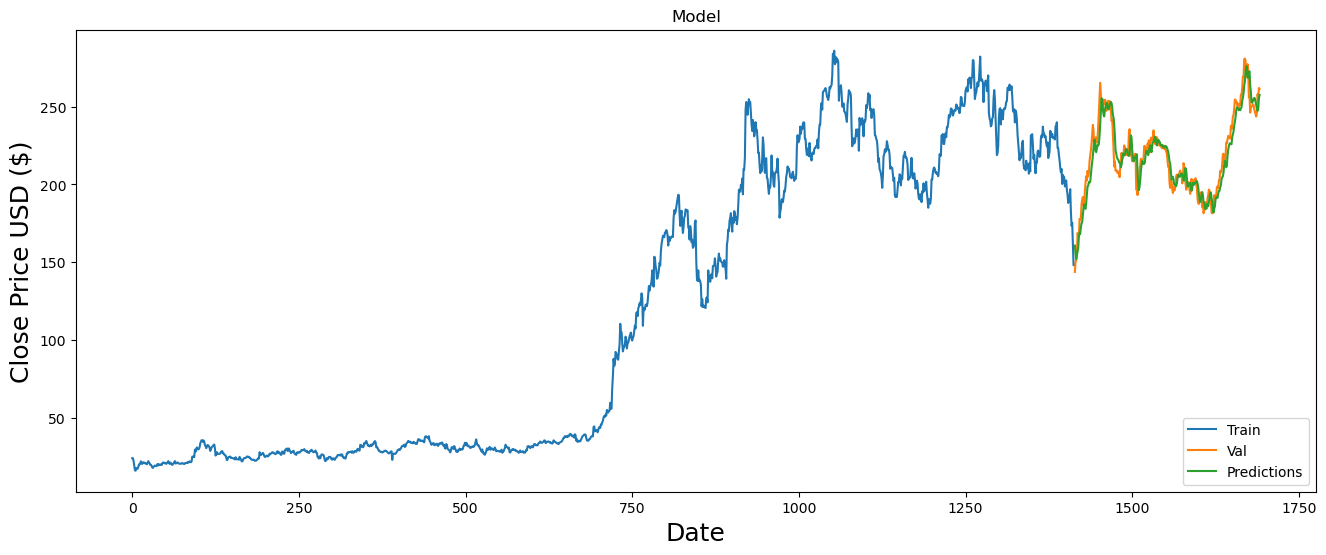

In [49]:

pltvalid['Predictions'] = test_predict
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(plttrain['Close'])
plt.plot(pltvalid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [193]:
model.fit(X_train, y_train,
          validation_data=(X_test,y_test),
          epochs=50,
          batch_size=64,
          verbose=1)

Epoch 1/50
18/18 [==============================] - 2s 138ms/step - loss: 3.1058e-04 - accuracy: 0.0000e+00 - val_loss: 0.0016 - val_accuracy: 0.0041
Epoch 2/50
18/18 [==============================] - 2s 139ms/step - loss: 3.3245e-04 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 0.0041
Epoch 3/50
18/18 [==============================] - 2s 137ms/step - loss: 3.2571e-04 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 0.0041
Epoch 4/50
18/18 [==============================] - 3s 145ms/step - loss: 3.2357e-04 - accuracy: 0.0000e+00 - val_loss: 0.0016 - val_accuracy: 0.0041
Epoch 5/50
18/18 [==============================] - 3s 143ms/step - loss: 3.1051e-04 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 0.0041
Epoch 6/50
18/18 [==============================] - 3s 146ms/step - loss: 3.0505e-04 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 0.0041
Epoch 7/50
18/18 [==============================] - 3s 154ms/step - loss: 3.1767e-04 - accuracy: 0.0

In [70]:
import glob
import os

In [76]:
path = r"C:\Users\Sparsh Mahajan\Downloads\individual_stocks_5yr\individual_stocks_5yr"

In [77]:
file = os.listdir(path)

In [78]:
os.path.join(path)

'C:\\Users\\Sparsh Mahajan\\Downloads\\individual_stocks_5yr\\individual_stocks_5yr'

In [79]:
from pathlib import Path



In [80]:
for p in Path(path).glob('*.csv'):
    df=pd.read_csv(p)
    scaler = MinMaxScaler()
    scaled_data=scaler.fit_transform(np.array(df['close']).reshape(-1,1))
    n_past = 60

# Prepare sequences for LSTM
    X_train, y_train = [], []
    for i in range(n_past, len(train_data)):
        X_train.append(train_data[i - n_past:i, 0])
        y_train.append(train_data[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)

# Similarly prepare sequences for the test set
    X_test, y_test = [], []
    for i in range(n_past, len(test_data)):
        X_test.append(test_data[i - n_past:i, 0])
        y_test.append(test_data[i, 0])
    X_test, y_test = np.array(X_test), np.array(y_test)

    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    model.fit(X_train, y_train,
          validation_data=(X_test,y_test),
          epochs=50,
          batch_size=64,
          verbose=1)


Epoch 1/50
18/18 [==============================] - 2s 140ms/step - loss: 8.7877e-05 - accuracy: 0.0000e+00 - val_loss: 4.8968e-04 - val_accuracy: 0.0041
Epoch 2/50
18/18 [==============================] - 3s 140ms/step - loss: 1.0577e-04 - accuracy: 0.0000e+00 - val_loss: 0.0011 - val_accuracy: 0.0041
Epoch 3/50
18/18 [==============================] - 3s 145ms/step - loss: 1.1558e-04 - accuracy: 0.0000e+00 - val_loss: 0.0011 - val_accuracy: 0.0041
Epoch 4/50
18/18 [==============================] - 3s 143ms/step - loss: 1.0800e-04 - accuracy: 0.0000e+00 - val_loss: 7.9815e-04 - val_accuracy: 0.0041
Epoch 5/50
18/18 [==============================] - 3s 147ms/step - loss: 1.0578e-04 - accuracy: 0.0000e+00 - val_loss: 5.2837e-04 - val_accuracy: 0.0041
Epoch 6/50
18/18 [==============================] - 3s 151ms/step - loss: 9.5827e-05 - accuracy: 0.0000e+00 - val_loss: 0.0011 - val_accuracy: 0.0041
Epoch 7/50
18/18 [==============================] - 3s 148ms/step - loss: 1.0169e-04 - a

18/18 [==============================] - 3s 147ms/step - loss: 1.1289e-04 - accuracy: 0.0000e+00 - val_loss: 5.6131e-04 - val_accuracy: 0.0041
Epoch 5/50
18/18 [==============================] - 3s 149ms/step - loss: 1.0932e-04 - accuracy: 0.0000e+00 - val_loss: 6.0142e-04 - val_accuracy: 0.0041
Epoch 6/50
18/18 [==============================] - 3s 146ms/step - loss: 9.7416e-05 - accuracy: 0.0000e+00 - val_loss: 5.1494e-04 - val_accuracy: 0.0041
Epoch 7/50
18/18 [==============================] - 3s 148ms/step - loss: 1.0885e-04 - accuracy: 0.0000e+00 - val_loss: 5.2538e-04 - val_accuracy: 0.0041
Epoch 8/50
18/18 [==============================] - 3s 145ms/step - loss: 8.8463e-05 - accuracy: 0.0000e+00 - val_loss: 7.8566e-04 - val_accuracy: 0.0041
Epoch 9/50
18/18 [==============================] - 3s 145ms/step - loss: 9.4328e-05 - accuracy: 0.0000e+00 - val_loss: 0.0012 - val_accuracy: 0.0041
Epoch 10/50
18/18 [==============================] - 3s 147ms/step - loss: 9.1864e-05 - acc

18/18 [==============================] - 3s 152ms/step - loss: 9.7957e-05 - accuracy: 0.0000e+00 - val_loss: 5.4977e-04 - val_accuracy: 0.0041
Epoch 11/50
18/18 [==============================] - 3s 152ms/step - loss: 1.0616e-04 - accuracy: 0.0000e+00 - val_loss: 0.0012 - val_accuracy: 0.0041
Epoch 12/50
18/18 [==============================] - 3s 151ms/step - loss: 1.2426e-04 - accuracy: 0.0000e+00 - val_loss: 4.1410e-04 - val_accuracy: 0.0041
Epoch 13/50
18/18 [==============================] - 3s 155ms/step - loss: 1.2213e-04 - accuracy: 0.0000e+00 - val_loss: 4.4518e-04 - val_accuracy: 0.0041
Epoch 14/50
18/18 [==============================] - 3s 152ms/step - loss: 9.9526e-05 - accuracy: 0.0000e+00 - val_loss: 4.1813e-04 - val_accuracy: 0.0041
Epoch 15/50
18/18 [==============================] - 3s 156ms/step - loss: 1.0393e-04 - accuracy: 0.0000e+00 - val_loss: 4.7686e-04 - val_accuracy: 0.0041
Epoch 16/50
18/18 [==============================] - 3s 163ms/step - loss: 1.1441e-04 

18/18 [==============================] - 3s 151ms/step - loss: 9.7773e-05 - accuracy: 0.0000e+00 - val_loss: 5.9388e-04 - val_accuracy: 0.0041
Epoch 14/50
18/18 [==============================] - 3s 150ms/step - loss: 9.3448e-05 - accuracy: 0.0000e+00 - val_loss: 4.2976e-04 - val_accuracy: 0.0041
Epoch 15/50
18/18 [==============================] - 3s 154ms/step - loss: 9.8748e-05 - accuracy: 0.0000e+00 - val_loss: 5.5591e-04 - val_accuracy: 0.0041
Epoch 16/50
18/18 [==============================] - 3s 152ms/step - loss: 9.9405e-05 - accuracy: 0.0000e+00 - val_loss: 4.6865e-04 - val_accuracy: 0.0041
Epoch 17/50
18/18 [==============================] - 3s 150ms/step - loss: 1.0099e-04 - accuracy: 0.0000e+00 - val_loss: 4.0185e-04 - val_accuracy: 0.0041
Epoch 18/50
18/18 [==============================] - 3s 152ms/step - loss: 1.0220e-04 - accuracy: 0.0000e+00 - val_loss: 7.7644e-04 - val_accuracy: 0.0041
Epoch 19/50
18/18 [==============================] - 3s 151ms/step - loss: 1.0231e

18/18 [==============================] - 3s 146ms/step - loss: 9.6581e-05 - accuracy: 0.0000e+00 - val_loss: 4.2188e-04 - val_accuracy: 0.0041
Epoch 17/50
18/18 [==============================] - 3s 149ms/step - loss: 9.4577e-05 - accuracy: 0.0000e+00 - val_loss: 5.6226e-04 - val_accuracy: 0.0041
Epoch 18/50
18/18 [==============================] - 3s 146ms/step - loss: 1.0120e-04 - accuracy: 0.0000e+00 - val_loss: 5.1566e-04 - val_accuracy: 0.0041
Epoch 19/50
18/18 [==============================] - 3s 147ms/step - loss: 1.0537e-04 - accuracy: 0.0000e+00 - val_loss: 4.6391e-04 - val_accuracy: 0.0041
Epoch 20/50
18/18 [==============================] - 3s 150ms/step - loss: 1.0034e-04 - accuracy: 0.0000e+00 - val_loss: 3.8769e-04 - val_accuracy: 0.0041
Epoch 21/50
18/18 [==============================] - 3s 156ms/step - loss: 9.5274e-05 - accuracy: 0.0000e+00 - val_loss: 3.9212e-04 - val_accuracy: 0.0041
Epoch 22/50
18/18 [==============================] - 3s 155ms/step - loss: 9.3476e

Epoch 19/50
18/18 [==============================] - 3s 165ms/step - loss: 9.6619e-05 - accuracy: 0.0000e+00 - val_loss: 4.0748e-04 - val_accuracy: 0.0041
Epoch 20/50
18/18 [==============================] - 3s 160ms/step - loss: 9.7820e-05 - accuracy: 0.0000e+00 - val_loss: 4.5950e-04 - val_accuracy: 0.0041
Epoch 21/50
18/18 [==============================] - 3s 157ms/step - loss: 9.7096e-05 - accuracy: 0.0000e+00 - val_loss: 5.2871e-04 - val_accuracy: 0.0041
Epoch 22/50
18/18 [==============================] - 3s 161ms/step - loss: 1.0473e-04 - accuracy: 0.0000e+00 - val_loss: 8.0151e-04 - val_accuracy: 0.0041
Epoch 23/50
18/18 [==============================] - 3s 157ms/step - loss: 1.0272e-04 - accuracy: 0.0000e+00 - val_loss: 4.5042e-04 - val_accuracy: 0.0041
Epoch 24/50
18/18 [==============================] - 3s 155ms/step - loss: 9.7579e-05 - accuracy: 0.0000e+00 - val_loss: 4.5367e-04 - val_accuracy: 0.0041
Epoch 25/50
18/18 [==============================] - 3s 153ms/step - l

In [46]:
model.save('./timeseries.h5')

C:\Users\Sparsh Mahajan\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [161]:
model.save('./ta.h5')

C:\Users\Sparsh Mahajan\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [5]:
from keras.models import load_model
model = load_model('ta.h5')

In [4]:
model